In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation
import matplotlib.image as img
import time
# import struct
import tensorflow as tf
import random as rd
# import cv2
import os
import PIL.Image as Image

from array import array
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# my project
from module.conf import PROJECT_DIR
# %matplotlib tk
%matplotlib inline

1. Load data

In [2]:
data_path = "/data/standard-ocr"
training_images_filepath = "".join([PROJECT_DIR, data_path, "/data/training_data"])
test_images_filepath = "".join([PROJECT_DIR, data_path, "/data/testing_data"])

def read_images_labels(images_filepath) -> tuple:
    labels = []
    images = []
    dir_names: list = os.listdir(path=images_filepath)
    dir_name_labels = []
    for dir_name in dir_names:
        if dir_name[0].isalnum():
            dir_name_labels.append(dir_name)
            pass
        pass
    dir_name_labels.sort()
    print(f"{(dir_name_labels)}")
    count = 0
    data_sample_count = 0
    for dir_name_label in dir_name_labels:
        img_file_path = "/".join((images_filepath, dir_name_label,))
        # print(f"{img_file_path}")
        # labels.append(count)
        # tmp_data_img = []
        for root, dir, file in os.walk(top=img_file_path):
            # print(f"{root}/{file}")
            for file_name in file:
                # print(f"{root}/{file_name}")
                # arr_img: np.ndarray = img.imread(fname=f"{root}/{file_name}")
                with Image.open(fp=f"{root}/{file_name}", mode="r") as img:
                    # tmp_data_img.append(img.copy())
                    labels.append(count)
                    images.append(img.copy())
                    data_sample_count+=1
                    pass
                pass
            pass
        # images.append(tmp_data_img)
        count+=1
        pass
    return images, labels, data_sample_count

def load_data() -> tuple:
    x_train, y_train, sample_train_count = read_images_labels(training_images_filepath)
    x_test, y_test, sample_test_count = read_images_labels(test_images_filepath)
    return (x_train, y_train, sample_train_count),(x_test, y_test, sample_test_count)

(X_train_img, y_train, sample_train_count), (X_test_img, y_test, sample_test_count) = load_data()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


2. Resize data

In [3]:
def resize_data(X: list) -> list:
    """
    X: list of nd.array for image
    """
    rs = []
    for arr_img in X:
        arr_img = arr_img.convert("L")
        ndarr_img = np.asarray(arr_img.resize(size=(30, 40)))
        # arr.append(ndarr_img)
        rs.append(ndarr_img)
        pass
    return rs

# print(f"{X_train_img[0]}")
# len(X_train_img[1(])
# X_train_img[0][0].size
# plt.imshow(X=np.asarray(X_train_img[0][0]), cmap="gray")
X_train = np.asarray(resize_data(X=X_train_img))/255
X_test  = np.asarray(resize_data(X=X_test_img))/255

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


3. train

3 20628 1008


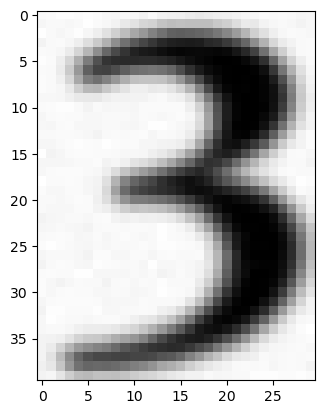

In [4]:
print(f"{y_train[2250]} {sample_train_count} {sample_test_count}")
plt.imshow(X=X_train[2250], cmap="gray")

3.1. Train by my NN:

In [ ]:
model: tf.keras.models.Model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(40, 30,)),
    # tf.keras.layers.Dense(units=25, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(units=15, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=36, activation=tf.keras.activations.softmax)
])

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(40, 30, 1)))
#------------------------------------
# Conv Block 1: 32 Filters, MaxPool.
#------------------------------------
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#------------------------------------
# Conv Block 2: 64 Filters, MaxPool.
#------------------------------------
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#------------------------------------
# Conv Block 3: 64 Filters, MaxPool.
#------------------------------------
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
#------------------------------------
# Flatten the convolutional features.
#------------------------------------
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(35, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 40, 30, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 15, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 7, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 7, 128)        73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 3, 128)       

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()])
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
              loss=loss_fn,
              metrics=["accuracy", "mae"])
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4),
#               loss=loss_fn,
#               metrics=["accuracy", "mae"])

In [19]:
# X_train.shape
model.fit(X_train, y_train, epochs=12, batch_size=100)

Epoch 1/12
207/207 [==============================] - 4s 17ms/step - loss: 13876.0322 - accuracy: 0.4606 - mae: 17.4730
Epoch 2/12
207/207 [==============================] - 3s 17ms/step - loss: 15169.6045 - accuracy: 0.4983 - mae: 17.4730
Epoch 3/12
207/207 [==============================] - 3s 17ms/step - loss: 27244.6562 - accuracy: 0.4615 - mae: 17.4730
Epoch 4/12
 40/207 [====>.........................] - ETA: 2s - loss: 36546.9258 - accuracy: 0.4470 - mae: 17.2089

KeyboardInterrupt: 

In [25]:
# model = tf.keras.applications.ResNet152(input_shape=(30, 40, 1), include_top=True, weights=None, classes=35)
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
#               loss=loss_fn,
#               metrics=["accuracy", "mae"])

# model.summary()
# model.save()
# resnet_model.fit(x=X_train, y=y_train, epochs=5, batch_size=64, verbose=1)

ValueError: Input size must be at least 32x32; Received: input_shape=(30, 40, 1)

4. test

In [14]:
# print(f"{y_test[1000]} {X_test[1000].shape}")
rs = model.predict(x=np.asarray([X_test[1000]]))
rs.argmax()
# plt.imshow(X_test[1000], cmap="gray")


1/1 [==============================] - 1s 591ms/step


13

In [15]:
eval_rs = model.evaluate(X_test, y_test, verbose=2)
# print(f"{eval_rs}")
c = 0
cp = 0
for i in range(100):
    test_indx = rd.randint(0, len(y_test)-1)
    x_test_ = np.asarray([X_test[test_indx]])

    # test_indx = rd.randint(0, len(y_train)-1)
    # x_test_ = np.asarray([X_train[test_indx]])

    result = model.predict(x=x_test_, verbose=0)
    # result = tf.nn.softmax(result).numpy()
    y_test_ = y_test
    if result.max() >= 0.5:
        if result.argmax() != y_test_[test_indx]:
            c+=1
            print(f"- [{i}]:img[{test_indx}]:{result}\npred:{result.max()}\npredict:{result.argmax()} solve:{y_test_[test_indx]}")
    else:
        print(f"can not predict:{test_indx}: {result.max()}")
        cp+=1
print(f"error: {c} can not pred:{cp}")

32/32 - 1s - loss: 1319173703598080.0000 - accuracy: 0.6954 - mae: 17.4730 - 657ms/epoch - 21ms/step
- [14]:img[1002]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
pred:1.0
predict:13 solve:35
- [15]:img[310]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
pred:1.0
predict:13 solve:11
- [17]:img[469]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
pred:1.0
predict:12 solve:16
- [29]:img[933]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
pred:1.0
predict:23 solve:33
- [31]:img[452]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
pred:1.0
predict:26 solve:16
- [32]:img[456]:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
plt.imshow(X_test[679], cmap="gray")